In [48]:
!pip install -q luwiji

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering

from luwiji.cluster import demo

# Sample Data

In [50]:
x1, y1 = demo.blob_data()
x2, y2 = demo.moon_data()
x3, y3 = demo.circle_data()

# Visualize

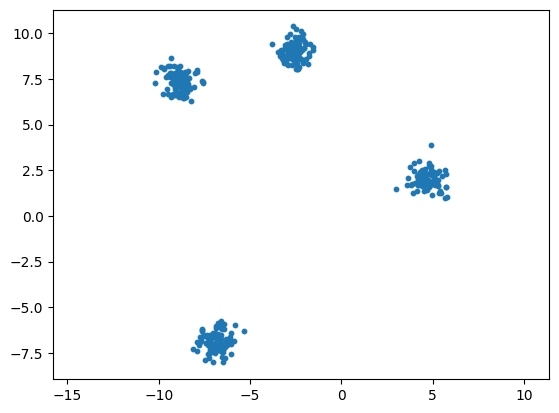

In [51]:
X1 = x1
plt.scatter(X1[:, 0], X1[:, 1], s=10)
plt.axis("equal");

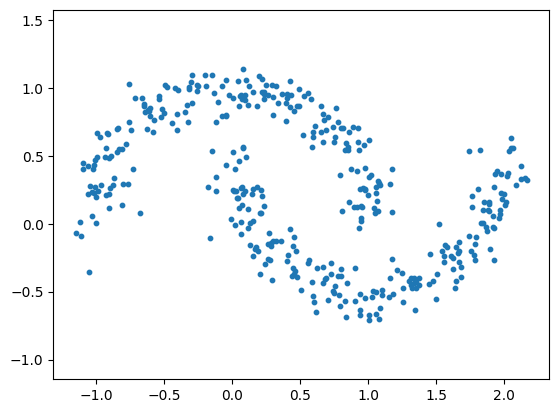

In [52]:
X2 = x2
plt.scatter(X2[:, 0], X2[:, 1], s=10)
plt.axis("equal");

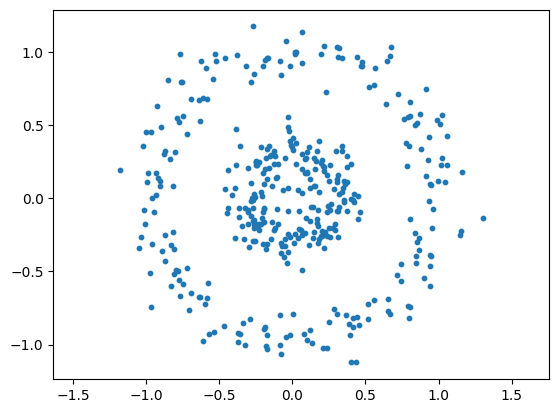

In [53]:
X3 = x3
plt.scatter(X3[:, 0], X3[:, 1], s=10)
plt.axis("equal");

# K-means Clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


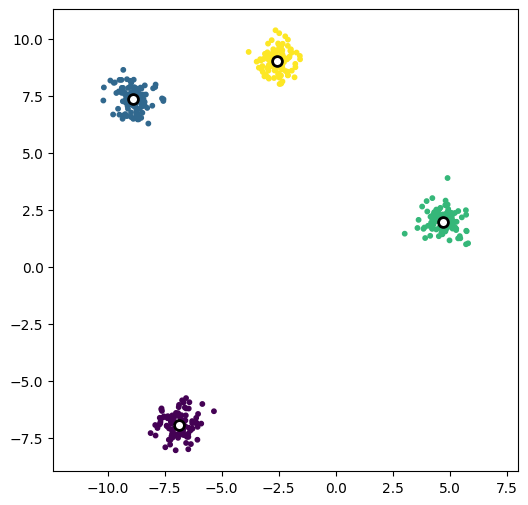

In [54]:
kmeans = KMeans(n_clusters=4)
member = kmeans.fit_predict(X1)
centre = kmeans.cluster_centers_

plt.figure(figsize=(6, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=member, s=10)
plt.scatter(centre[:, 0], centre[:, 1], c='w', edgecolors='k', s=50, linewidths=2)
plt.axis("equal");

## K-means weakness
- Kesulitan untuk menentukan K
    - Solusi: elbow analysis, silhouette score, and others
- Hanya untuk data yang bisa di rata-ratakan
    - Solusi: K-medoid (untuk mix numeric dan categoric), K-modes (untuk kategorikal), K-prototype
- Solusi tidak selalu optimal
- Hanya untuk data yang linearly-separable

## Contoh: Moon Dataset

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


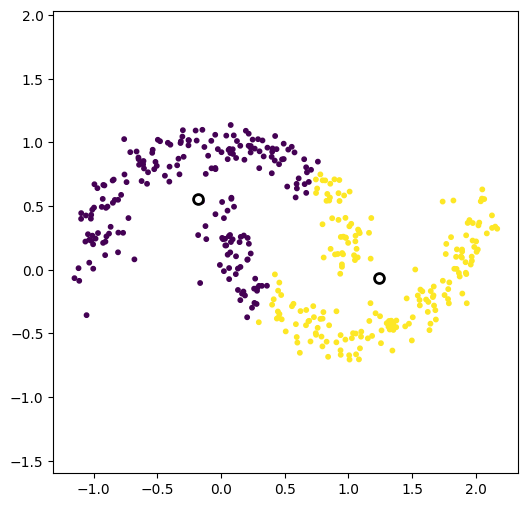

In [55]:
kmeans = KMeans(n_clusters=2)
member = kmeans.fit_predict(X2)
centre = kmeans.cluster_centers_

plt.figure(figsize=(6, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=member, s=10)
plt.scatter(centre[:, 0], centre[:, 1], c='w', edgecolors='k', s=50, linewidths=2)
plt.axis("equal");

## Contoh: Donut Dataset

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


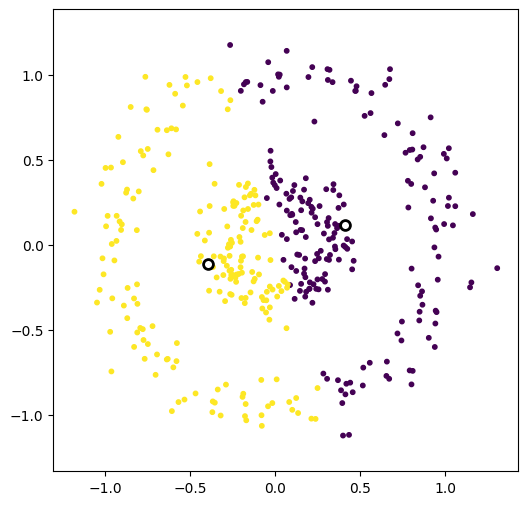

In [56]:
kmeans = KMeans(n_clusters=2)
member = kmeans.fit_predict(X3)
centre = kmeans.cluster_centers_

plt.figure(figsize=(6, 6))
plt.scatter(X3[:, 0], X3[:, 1], c=member, s=10)
plt.scatter(centre[:, 0], centre[:, 1], c='w', edgecolors='k', s=50, linewidths=2)
plt.axis("equal");

## Menentukan K(n_cluster) tanpa label -> Inertia / Elbow Analysis

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

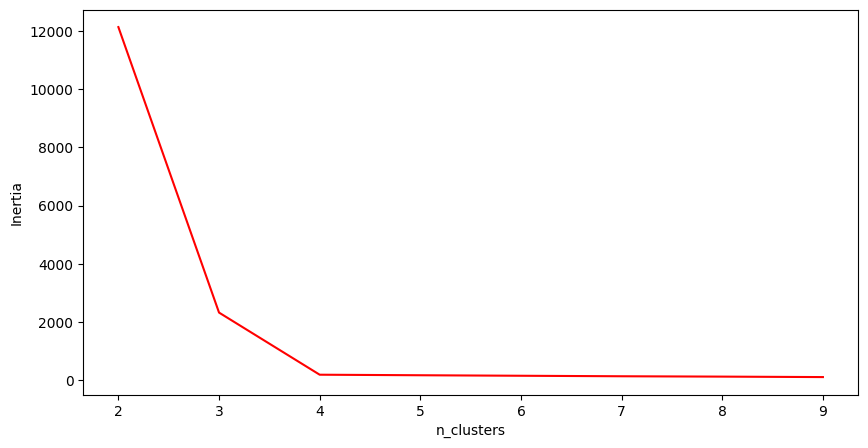

In [58]:
X = X1
score = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(X)
    score.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), score, 'r-')
plt.ylabel('Inertia')
plt.xlabel('n_clusters');

### `Elbow` berada di `n_cluster=4`

## Menentukan K(n_cluster) dan ada label -> Silhouette Score

In [59]:
from sklearn.metrics import silhouette_score

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

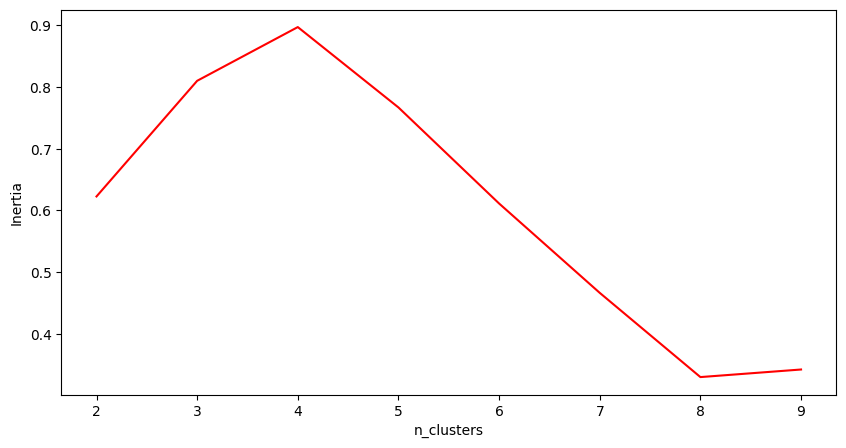

In [60]:
X = X1
score = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(X)
    
    siluet = silhouette_score(X, member, metric='euclidean')
    score.append(siluet)
    
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), score, 'r-')
plt.ylabel('Inertia')
plt.xlabel('n_clusters');

### Nilai `Siluet` berada di `n_cluster=4`

# Beyond K-means

## Spectral Clustering

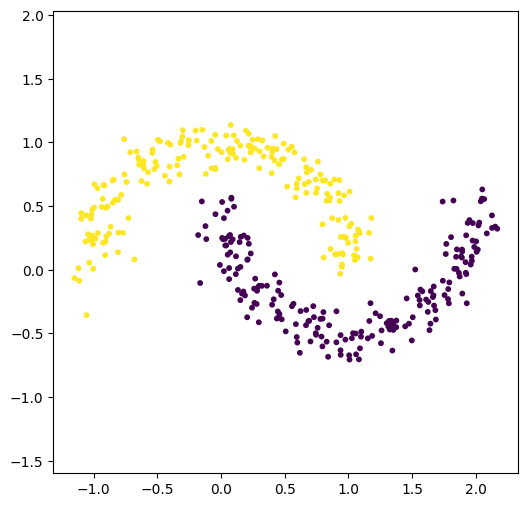

In [64]:
sc = SpectralClustering(n_clusters=2, gamma=100)
labels = sc.fit_predict(X2)

plt.figure(figsize=(6, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=10)
plt.axis("equal");

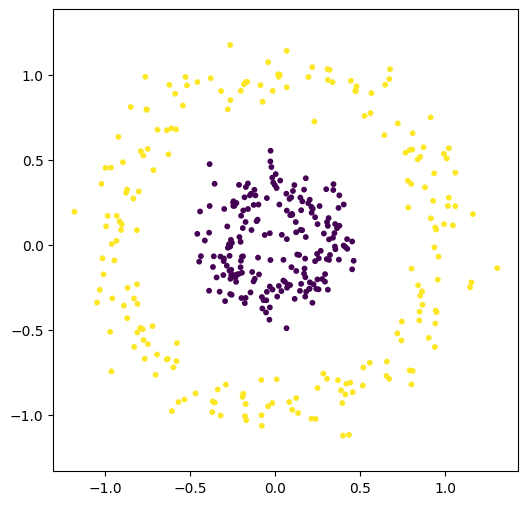

In [65]:
sc = SpectralClustering(n_clusters=2, gamma=100)
labels = sc.fit_predict(X3)

plt.figure(figsize=(6, 6))
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=10)
plt.axis("equal");

## DBSCAN

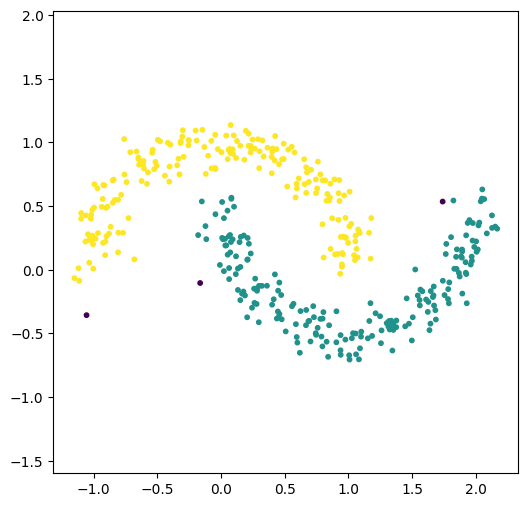

In [68]:
dbscan = DBSCAN(eps=0.2)
labels = dbscan.fit_predict(X2)

plt.figure(figsize=(6, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=10)
plt.axis("equal");

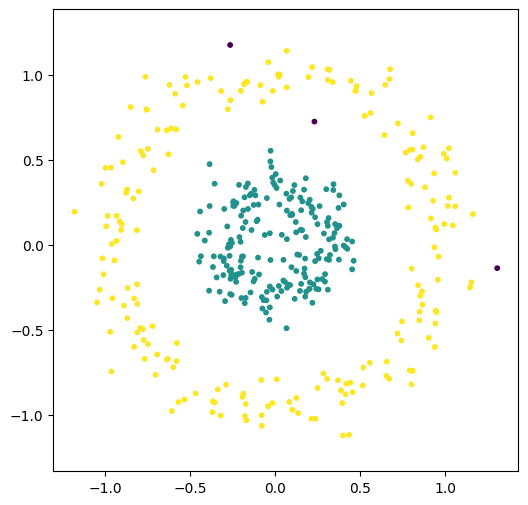

In [76]:
dbscan = DBSCAN(eps=0.2)
labels = dbscan.fit_predict(X3)

plt.figure(figsize=(6, 6))
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=10)
plt.axis("equal");

## AHC

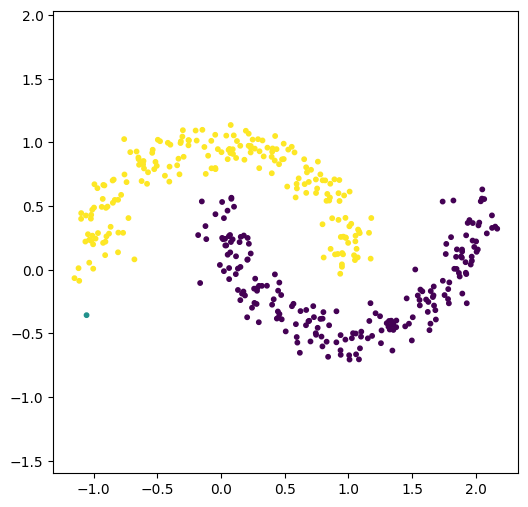

In [82]:
ahc = AgglomerativeClustering(n_clusters=3, linkage='single')
labels = ahc.fit_predict(X2)

plt.figure(figsize=(6, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=10)
plt.axis("equal");

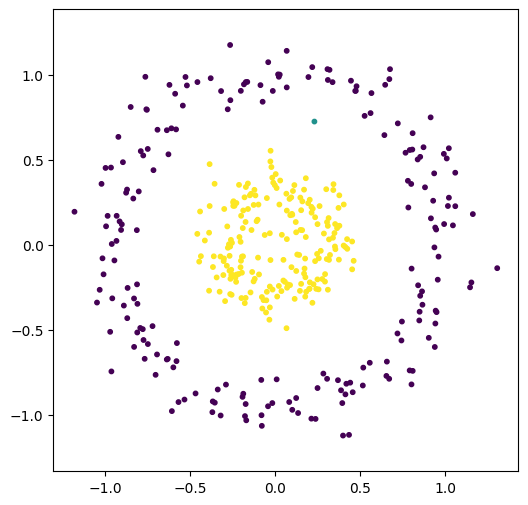

In [83]:
ahc = AgglomerativeClustering(n_clusters=3, linkage='single')
labels = ahc.fit_predict(X3)

plt.figure(figsize=(6, 6))
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=10)
plt.axis("equal");

## AHC-Scipy

In [85]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [86]:
X, y = demo.blob_data(30)

In [87]:
z = linkage(X)

### get membership

In [90]:
labels = fcluster(z, 4, criterion='maxclust')
labels

array([4, 1, 2, 2, 4, 4, 1, 1, 4, 1, 1, 1, 2, 2, 2, 1, 3, 2, 4, 3, 3, 3,
       3, 2, 2, 4, 3, 4, 4, 3], dtype=int32)

In [91]:
labels = fcluster(z, 4, criterion='distance')
labels

array([4, 1, 2, 2, 4, 4, 1, 1, 4, 1, 1, 1, 2, 2, 2, 1, 3, 2, 4, 3, 3, 3,
       3, 2, 2, 4, 3, 4, 4, 3], dtype=int32)

### Visualize Dendrogram

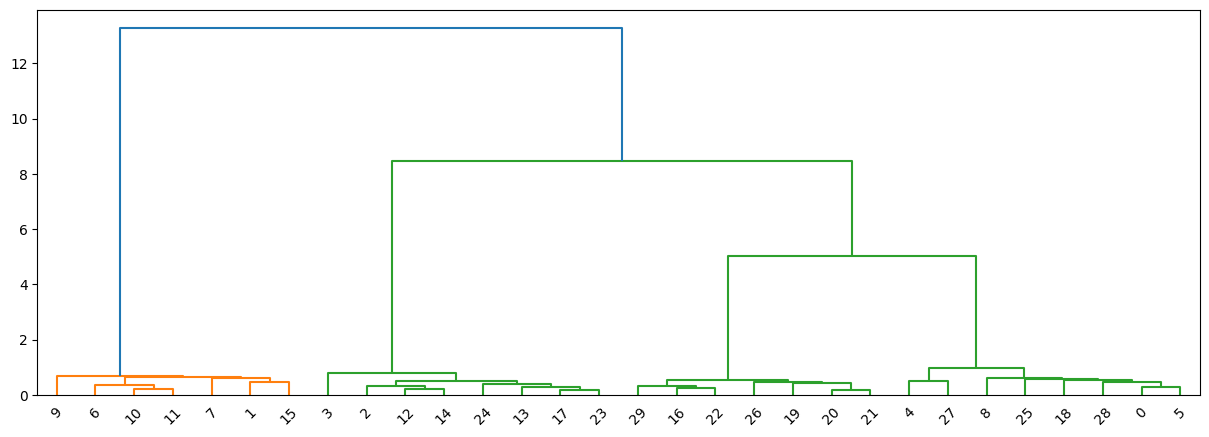

In [94]:
plt.figure(figsize=(15, 5))
dendrogram(z);